In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [4]:
sales_dataset=pd.read_csv('D:\oaisis\sales\dataset\Advertising.csv')

In [5]:
sales_dataset.head()

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
sales_dataset.tail()

,Id,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
sales_dataset.shape

(200, 5)

In [8]:
sales_dataset.describe()

,Id,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
sales_dataset.isnull().sum()

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
sales_dataset.columns

Index(['Id', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
sales_dataset.rank()

,Id,TV,Radio,Newspaper,Sales
0,1.0,162.0,157.0,188.0,182.0
1,2.0,34.0,162.0,150.5,51.5
2,3.0,13.5,187.0,189.0,32.5
3,4.0,102.0,169.0,177.0,158.0
4,5.0,117.0,54.5,176.0,100.5
...,...,...,...,...,...
195,196.0,30.0,24.0,55.0,19.5
196,197.0,66.0,29.5,28.0,42.0
197,198.0,115.5,47.5,23.5,97.5
198,199.0,192.0,173.5,187.0,198.0


In [13]:
sales_dataset['Sales'].max()

27.0

In [14]:
sales_dataset['Sales'].min()

1.6

In [15]:
sales_dataset['Sales'].mode()

0    9.7
Name: Sales, dtype: float64

In [16]:
sales_dataset['Sales'].median()

12.9

Data Visualization

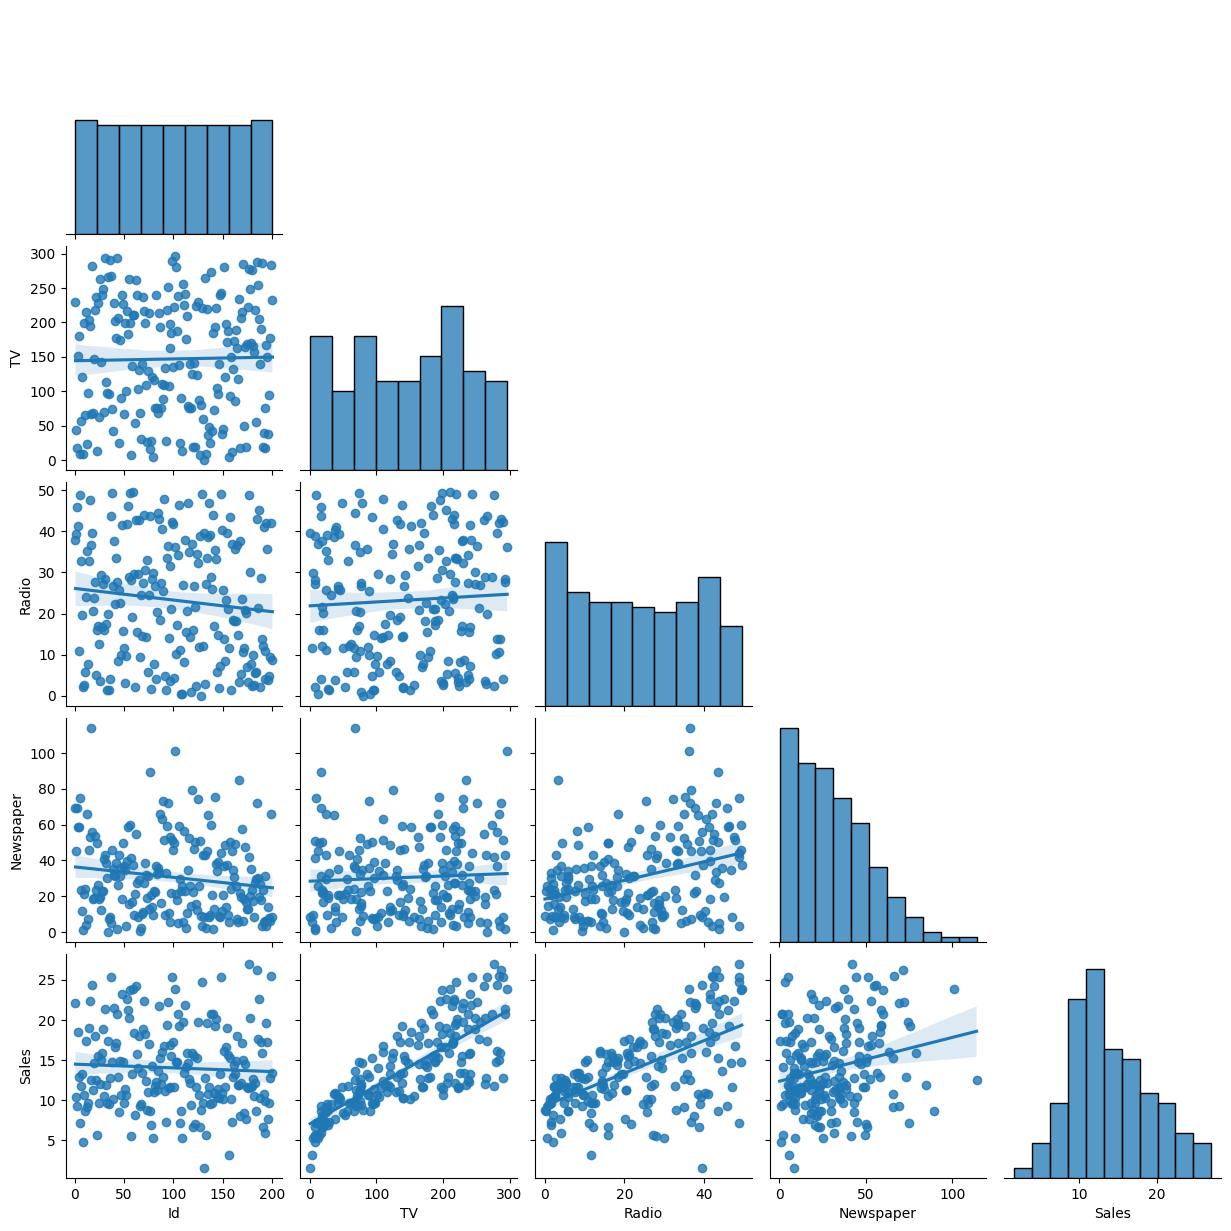

In [17]:
sns.pairplot(sales_dataset, kind="reg", corner=True)

### Correlation Matrix

In [18]:
sales_dataset.corr()

,Id,TV,Radio,Newspaper,Sales
Id,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


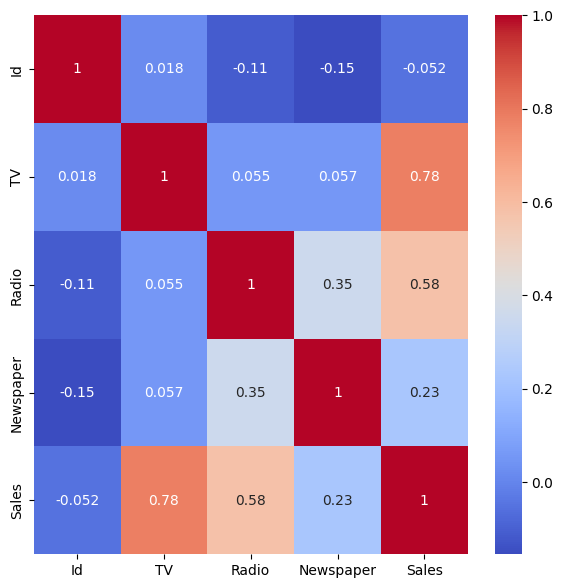

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(sales_dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot: >

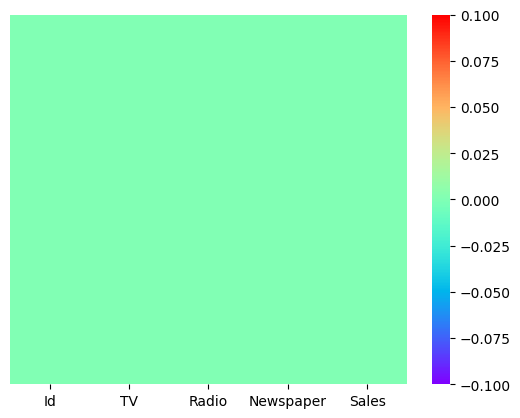

In [20]:
sns.heatmap(sales_dataset.isnull(),cmap="rainbow",yticklabels=False)

### Spliting data

In [21]:
x=sales_dataset.iloc[:,0:-1]
x

,Id,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [23]:
y=sales_dataset.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [25]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()
sc

StandardScaler()

In [36]:
x_train_scaled=sc.fit_transform(x_train)

In [37]:
x_test_scaled=sc.fit_transform(x_test)

In [31]:
x_train

,Id,TV,Radio,Newspaper
116,117,139.2,14.3,25.6
138,139,43.0,25.9,20.5
155,156,4.1,11.6,5.7
82,83,75.3,20.3,32.5
160,161,172.5,18.1,30.7
...,...,...,...,...
58,59,210.8,49.6,37.7
21,22,237.4,5.1,23.5
49,50,66.9,11.7,36.8
64,65,131.1,42.8,28.9


In [32]:
x_test

,Id,TV,Radio,Newspaper
56,57,7.3,28.1,41.4
37,38,74.7,49.4,45.7
67,68,139.3,14.5,10.2
79,80,116.0,7.7,23.1
80,81,76.4,26.7,22.3
188,189,286.0,13.9,3.7
183,184,287.6,43.0,71.8
10,11,66.1,5.8,24.2
128,129,220.3,49.0,3.2
62,63,239.3,15.5,27.3


In [33]:
y_train

116    12.2
138     9.6
155     3.2
82     11.3
160    14.4
       ... 
58     23.8
21     12.5
49      9.7
64     18.0
68     18.9
Name: Sales, Length: 160, dtype: float64

In [34]:
y_test

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
Name: Sales, dtype: float64

In [35]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)

### fitting model

In [38]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred= model.predict(x_test)
print(y_pred)

[ 114.55752805  436.40756282  588.53658647  477.70070325  376.15340219
 1148.49947478 1235.78892913  282.78389178  998.92532981  980.24913841
  302.44601317 1214.52636178  947.54403773  154.16193636  955.5075943
  250.54765782  673.12017275  243.50595497 1078.84095063  327.63095522
 1011.20761604  205.08277224  880.62045542  611.78528118  726.6558458
  132.03805107  924.15799317 1001.73285371  197.17621948  648.70910265
  913.41219268  752.35088496  791.52892911  942.44223158  900.33712278
  293.98872843  591.6688456   102.0892925   493.50499637  815.48952431]


In [40]:
pd.DataFrame({'test':y_test,'pred':y_pred}).head()

,test,pred
56,5,114.557528
37,14,436.407563
67,13,588.536586
79,11,477.700703
80,11,376.153402


In [42]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [43]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 629.235328012617
 RMSE: 509449.0614983264


In [45]:
model.score(x_test,y_test)

-17671.328904633647

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test,y_pred)

-17671.328904633647